In [276]:
from flint import *
import numpy as np

In [279]:
n=250
k=100
zeros = [0 for i in range(2*k)]
ctx.dps = n
with open("NImZetaZero40000_1_40000.val") as f:
    j = k-1
    for i in range(k):
        s = f.readline()[:n]
        zeros[i+k] = acb("0.5",s)
        zeros[j] = acb("0.5","-"+s)
        j = j - 1

 # Задание 1

## Первый вариант построения и решения системы

\begin{align}
\begin{bmatrix}
    1^{-s_1} & 2^{-s_1} & \dots & n^{-s_1} \\
    1^{-s_2} & 2^{-s_2} & \dots & n^{-s_2} \\
    \vdots & \vdots & \ddots & \vdots \\
    1^{-s_{n-1}} & 2^{-s_{n-1}} & \dots & n^{-s_{n-1}}
 \end{bmatrix}
\begin{bmatrix}
    a_{1}=1 \\
    a_2 \\
    \vdots \\
    a_{n}
\end{bmatrix}
&=
\begin{bmatrix}
    0 \\
    0 \\
    \vdots \\
    0
\end{bmatrix}
\end{align}

Если принять, что 1 в любой степени это 1, при этом имея $a_1 = 1$, можно "перекинуть" единицы вправо, таким образом слева получится квадратная матрица $(n-1)\times(n-1)$:

\begin{align}
\begin{bmatrix}
    2^{-s_1} & 3^{-s_1} & \dots & n^{-s_1} \\
    2^{-s_2} & 3^{-s_2} & \dots & n^{-s_2} \\
    \vdots & \vdots & \ddots & \vdots \\
    2^{-s_{n-1}} & 3^{-s_{n-1}} & \dots & n^{-s_{n-1}}
 \end{bmatrix}
\begin{bmatrix}
    a_{2} \\
    a_3 \\
    \vdots \\
    a_{n}
\end{bmatrix}
&=
\begin{bmatrix}
    -1 \\
    -1 \\
    \vdots \\
    -1
\end{bmatrix}
\end{align}

Построение и решение системы:


In [274]:
def R(s,coefs):
    value = acb(1)
    for i in range(coefs.nrows()):
        value += coefs[i,0]*acb(i+2).pow(-s)
    return value

A = acb_mat(len(zeros), len(zeros))
for i in range(len(zeros)):
    for j in range(len(zeros)):
        A[i,j] = acb(j+2).pow(-zeros[i])

B = acb_mat([[-1] for i in range(len(zeros))])
X = A.solve(B)

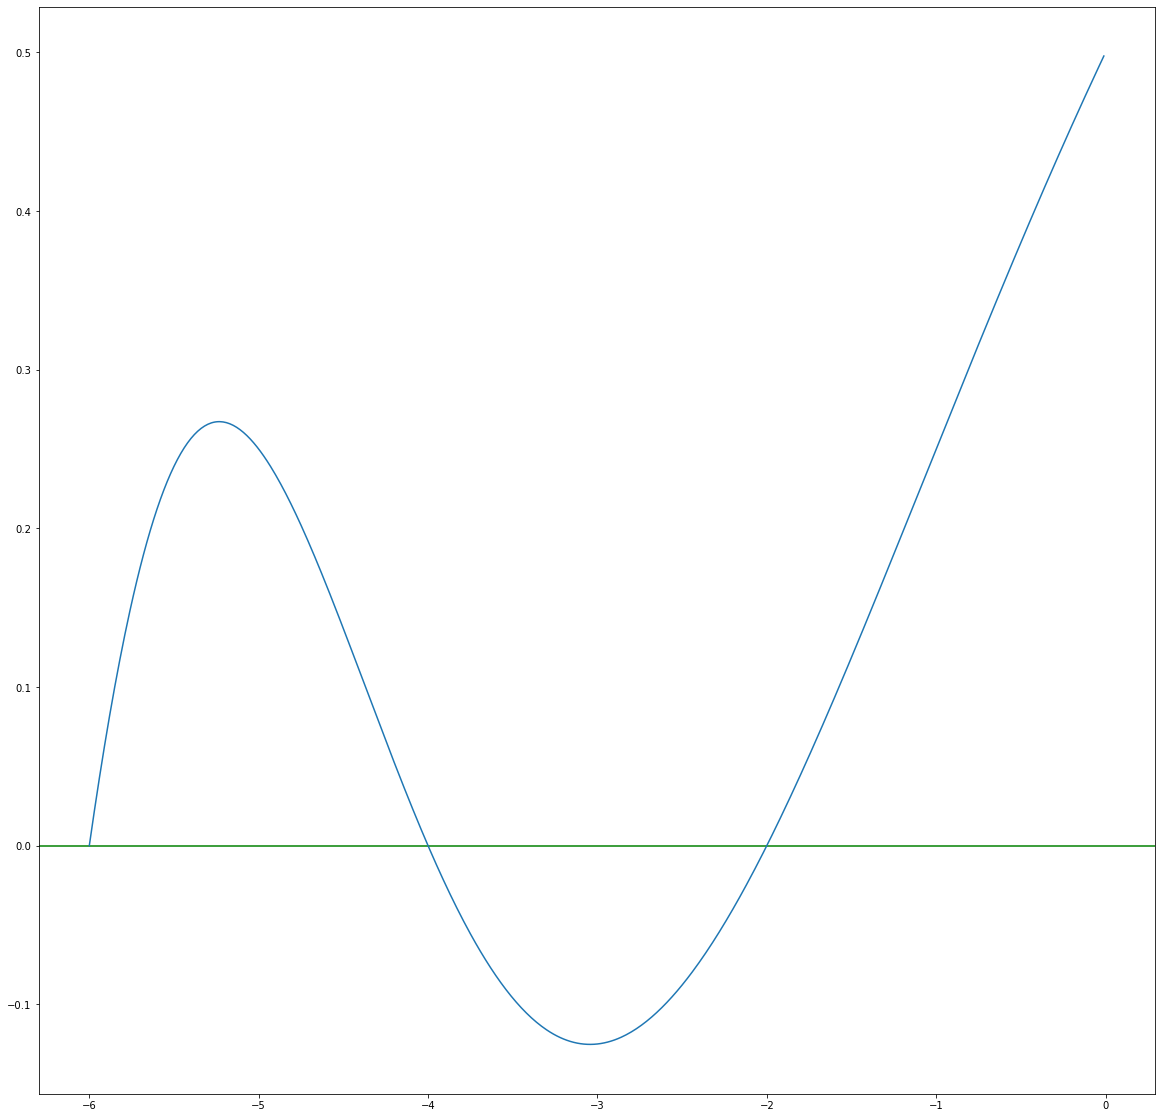

In [275]:
import matplotlib.pyplot as plt
res = []
interval = np.arange(-6,0,0.01)
plt.rcParams["figure.figsize"] = (20,20)
for item in interval:
    res.append(R(item,X).real)
    
plt.axhline(y=0, color='green', linestyle='-')
plt.plot(interval, res)

## Второй вариант построения и решения системы

\begin{align}
\begin{bmatrix}
    1^{-s_1} & 2^{-s_1} & \dots & n^{-s_1} \\
    1^{-s_2} & 2^{-s_2} & \dots & n^{-s_2} \\
    \vdots & \vdots & \ddots & \vdots \\
    1^{-s_{n-1}} & 2^{-s_{n-1}} & \dots & n^{-s_{n-1}}
 \end{bmatrix}
\begin{bmatrix}
    a_{1}=1 \\
    a_2 \\
    \vdots \\
    a_n
\end{bmatrix}
&=
\begin{bmatrix}
    0 \\
    0 \\
    \vdots \\
    0
\end{bmatrix}
\end{align}

Добавив строку 1,0,0...0 в конец левой матрицы и единицу в конец вектора b получим слева квадратную матрицу:

\begin{align}
\begin{bmatrix}
    1^{-s_1} & 2^{-s_1} & \dots & n^{-s_1} \\
    1^{-s_2} & 2^{-s_2} & \dots & n^{-s_2} \\
    \vdots & \vdots & \ddots & \vdots \\
    1^{-s_{n-1}} & 2^{-s_{n-1}} & \dots & n^{-s_{n-1}} \\
    1 & 0 & \dots & 0 
 \end{bmatrix}
\begin{bmatrix}
    a_1 \\
    a_2 \\
    \vdots \\
    a_{n-1} \\
    a_{n}
\end{bmatrix}
&=
\begin{bmatrix}
    0 \\
    0 \\
    \vdots \\
    0 \\
    1
\end{bmatrix}
\end{align}

Построение и решение системы:


In [280]:
def R(s,coefs):
    value = acb(0)
    for i in range(coefs.nrows()):
        value += coefs[i,0]*acb(i+1).pow(-s)
    return value

m_size = len(zeros)
A = acb_mat(m_size, m_size)

for i in range(m_size):
    for j in range(m_size):
        A[i,j] = acb(j+1).pow(-zeros[i])
        
for i in range(1,m_size):
    A[m_size-1,i] = 0  
A[m_size-1,0] = 1

B = acb_mat(m_size,1)
B = acb_mat([[0] for i in range(m_size)])
B[m_size-1,0] = 1
X = A.solve(B)

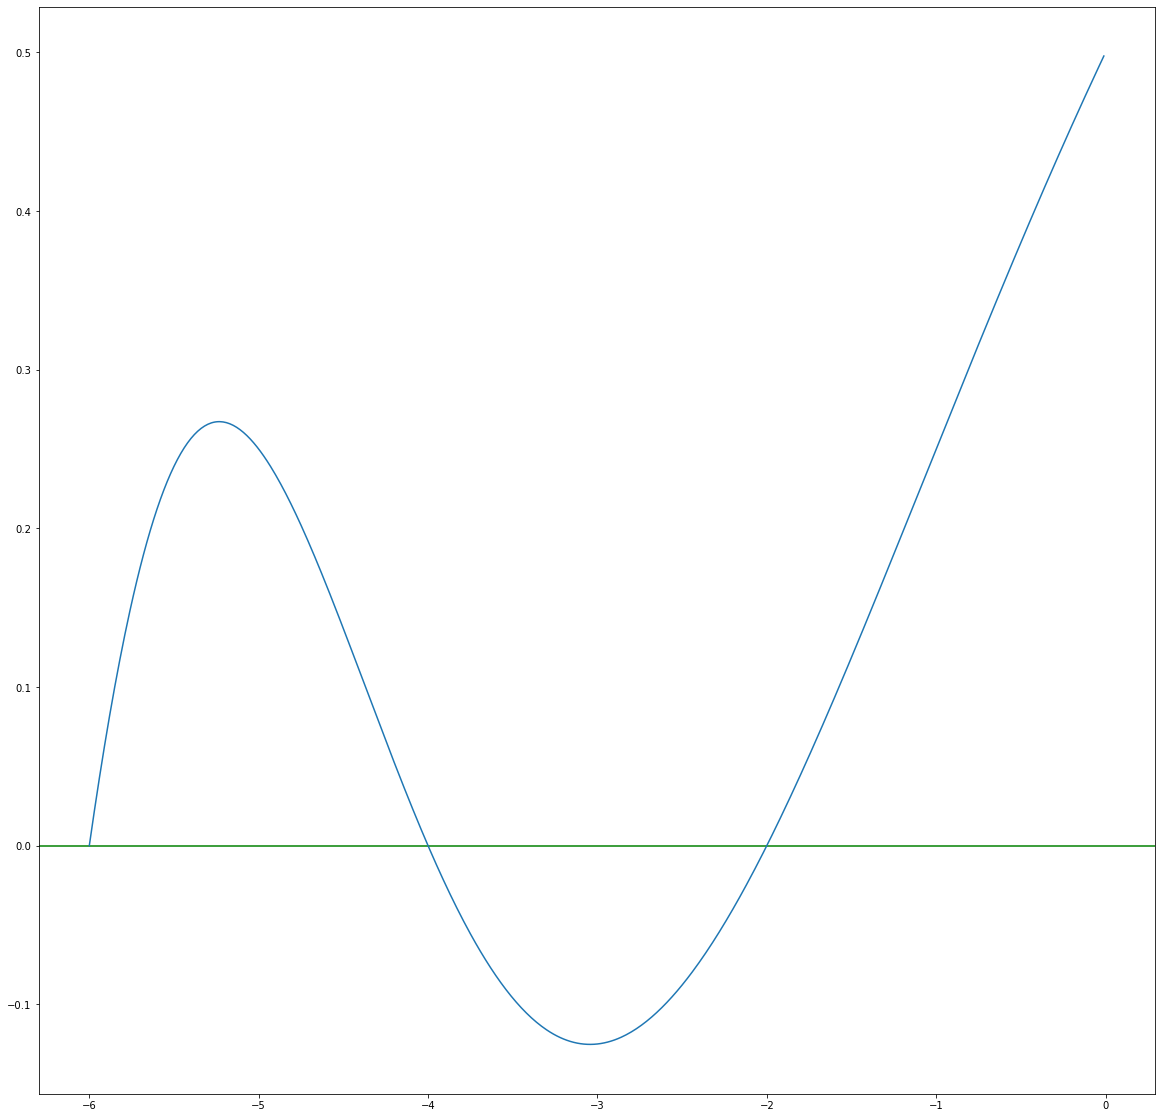

In [281]:
import matplotlib.pyplot as plt
res = []
interval = np.arange(-6,0,0.01)
plt.rcParams["figure.figsize"] = (20,20)
for item in interval:
    res.append(R(item,X).real)
    
plt.axhline(y=0, color='green', linestyle='-')
plt.plot(interval, res)

# Задание 2

In [267]:
DIAGONAL = acb_mat([[0] for i in range(len(zeros) + 2)])
diag = acb_mat([[0] for i in range(len(zeros) + 2)])
InvNTildedelta = acb_mat([[0] for i in range(len(zeros) + 2)])
L = acb_mat(len(zeros) + 2, len(zeros) + 2)
LinVectElemNew = acb_mat(len(zeros) + 2, len(zeros) + 2)
a = acb_mat(len(zeros) + 2, len(zeros) + 2)
M = acb_mat(len(zeros),len(zeros))

for i in range(len(zeros)):
    for j in range(len(zeros)):
        M[i,j] = acb(i+1).pow(-zeros[j])


for i in range(len(zeros)):
    diag[i,0] = M[i,i]
    DIAGONAL[i,0] = diag[i,0] * (1 if i == 0 else DIAGONAL[i-1,0])
    for j in range(i+1,len(zeros)):
        z = - M[j,i] / diag[i,0]
        L[j,i] = z
        M[j,i] = z
        for k in range(i+1,len(zeros)):
            M[j,k] = M[j,k] + M[i,k] * M[j,i]
            L[j,k] = M[j,k]
            
for k in range(len(zeros)):
    for i in range(k+1,len(zeros)):
        for j in range(i+1,len(zeros)):
            L[j,k] = L[j,k] + L[i,k] * M[j,i]
            
for j in range(len(zeros)):
    for k in range(j-1):
        LinVectElemNew[j,k] = L[j,k] * (1 if j == 0 else DIAGONAL[j-1,0])
    LinVectElemNew[j,j] = (1 if j == 0 else DIAGONAL[j-1,0])
    InvNTildedelta[j,0] = acb(1) / LinVectElemNew[j,0]
    for k in range(j):
        a[j,k] = LinVectElemNew[j,k] * InvNTildedelta[j,0]

Для 200 нулей:

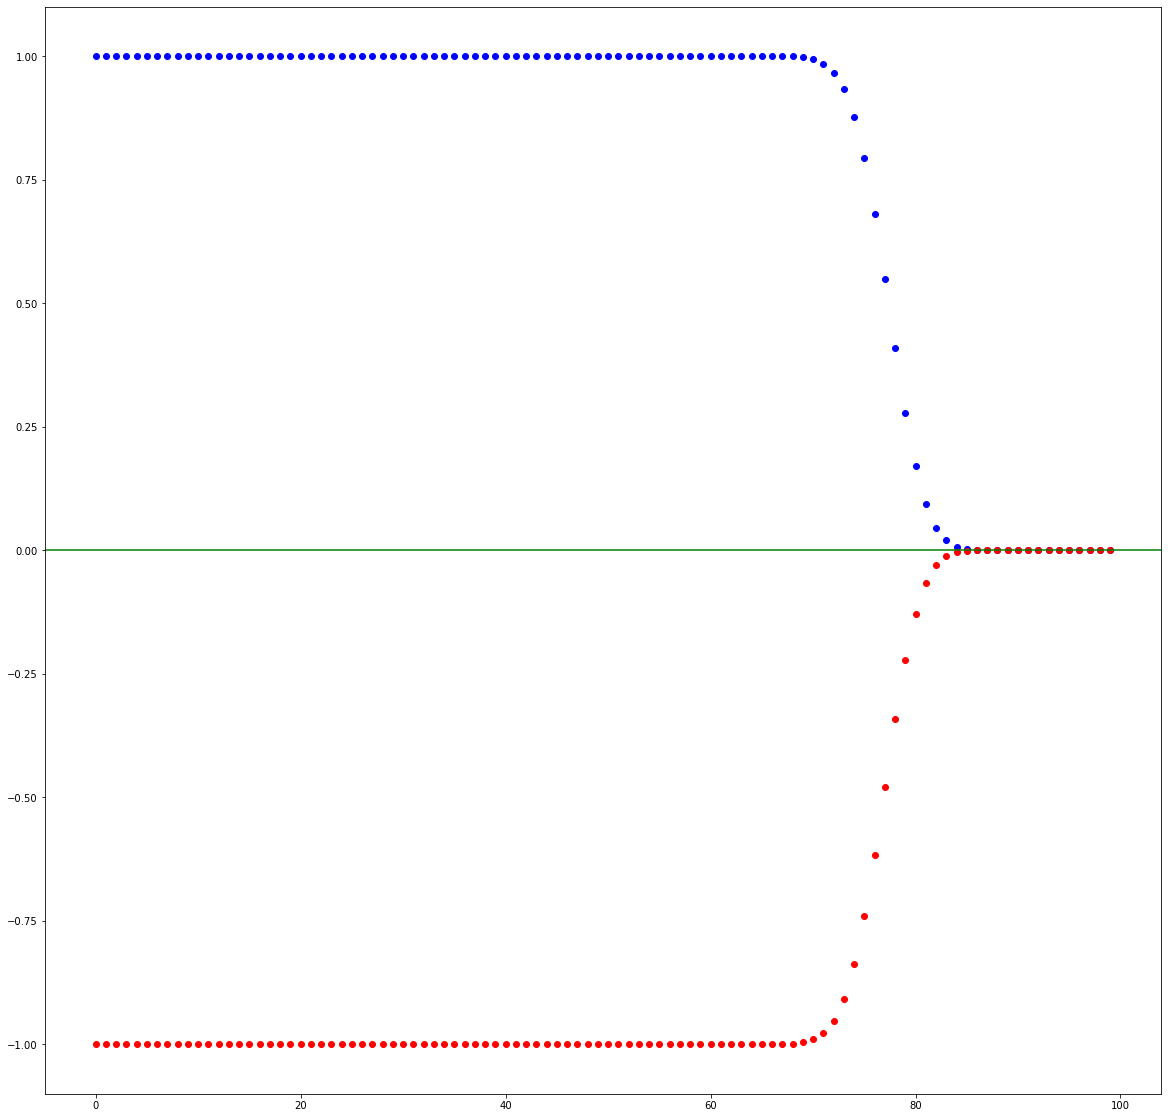

In [268]:
result_a = []
for i in range(len(zeros)):
    result_a.append(a[len(zeros)-1,i].real)

import matplotlib.pyplot as plt
res_even = []
res_odd = []
plt.rcParams["figure.figsize"] = (20,20)
for item in range(0,len(result_a),2):
    res_even.append(result_a[item])
for item in range(1,len(result_a),2):
    res_odd.append(result_a[item])
plt.plot(res_even, 'bo')
plt.plot(res_odd, 'ro')
plt.axhline(y=0, color='green', linestyle='-')
plt.show()

Для 170 нулей:

На прошлом графике с 200 нулями в районе начал спуска и подъема графиков значения представляют довольно гладкую линию, с 170 нулями же заметна небольшая неровность, бугор. 

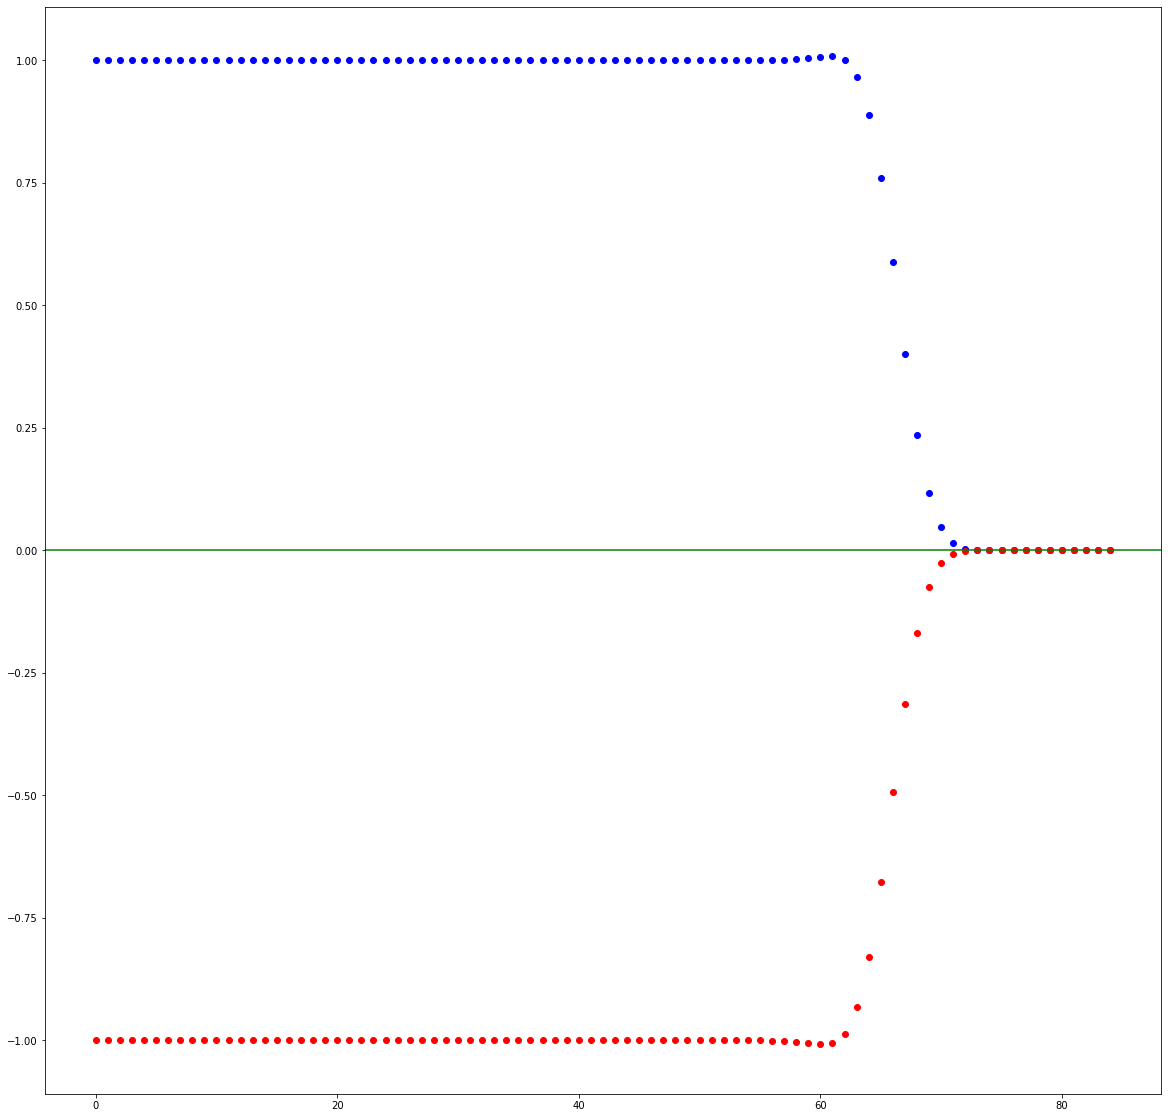

In [292]:
result_a = []
t = 30
for i in range(len(zeros)-t):
    result_a.append(a[len(zeros)-1-t,i].real)

import matplotlib.pyplot as plt
res_even = []
res_odd = []
plt.rcParams["figure.figsize"] = (20,20)
for item in range(0,len(result_a),2):
    res_even.append(result_a[item])
for item in range(1,len(result_a),2):
    res_odd.append(result_a[item])
plt.plot(res_even, 'bo')
plt.plot(res_odd, 'ro')
plt.axhline(y=0, color='green', linestyle='-')
plt.show()

Для 160 нулей этот бугор теперь явно выражен. 

Также до того, как значениям стать нулями, они переходят за ось y=0 и как-бы синие коэффициенты теперь стремятся к нулю снизу-вверх, а красные сверху-вниз.

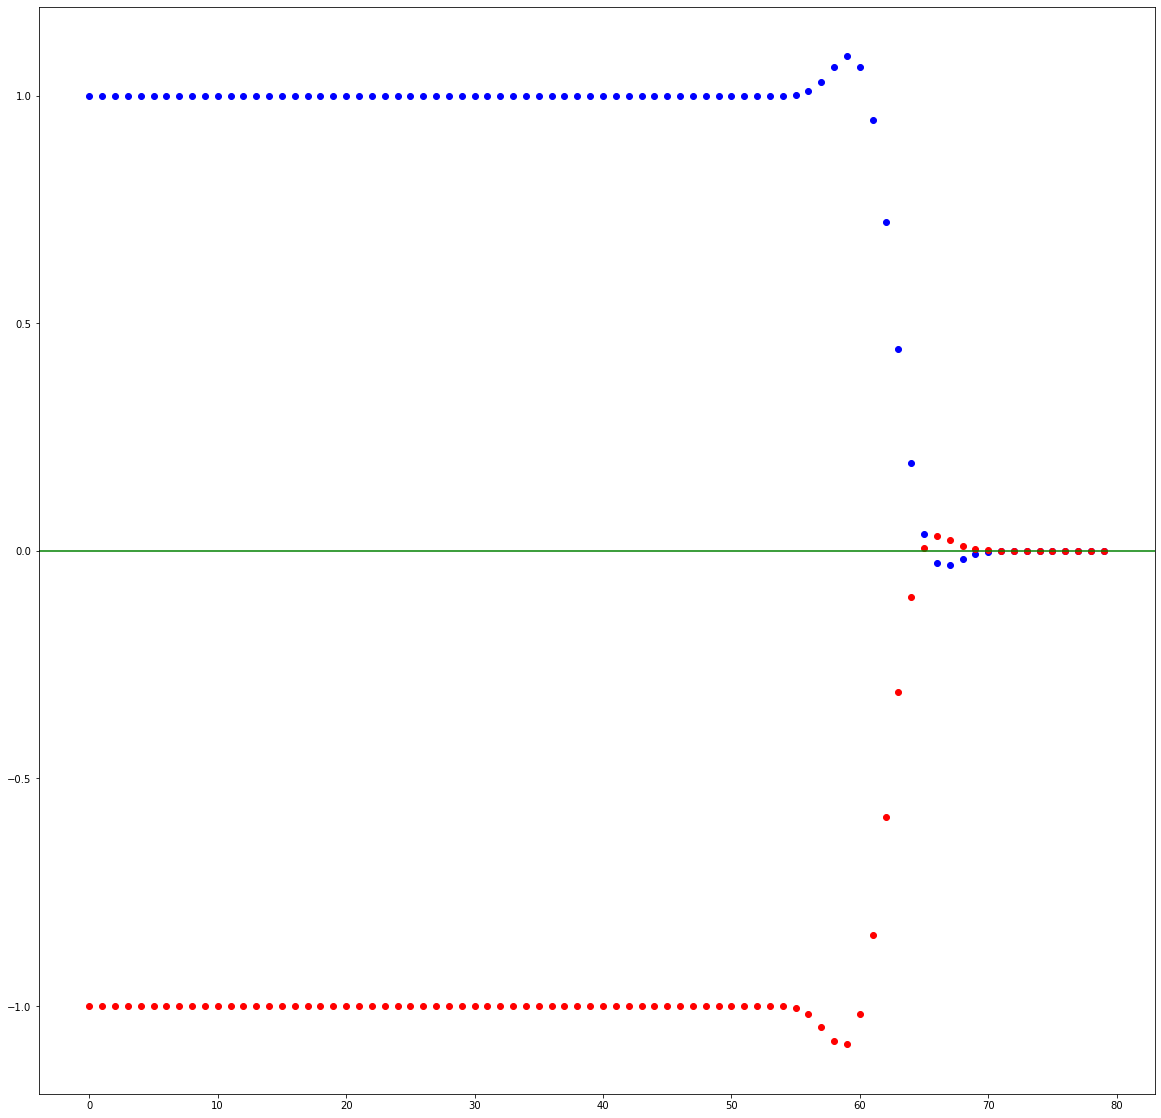

In [293]:
result_a = []
t = 40
for i in range(len(zeros)-t):
    result_a.append(a[len(zeros)-1-t,i].real)

import matplotlib.pyplot as plt
res_even = []
res_odd = []
plt.rcParams["figure.figsize"] = (20,20)
for item in range(0,len(result_a),2):
    res_even.append(result_a[item])
for item in range(1,len(result_a),2):
    res_odd.append(result_a[item])
plt.plot(res_even, 'bo')
plt.plot(res_odd, 'ro')
plt.axhline(y=0, color='green', linestyle='-')
plt.show()

Для 150 нулей предыдущее свойство еще заметнее.

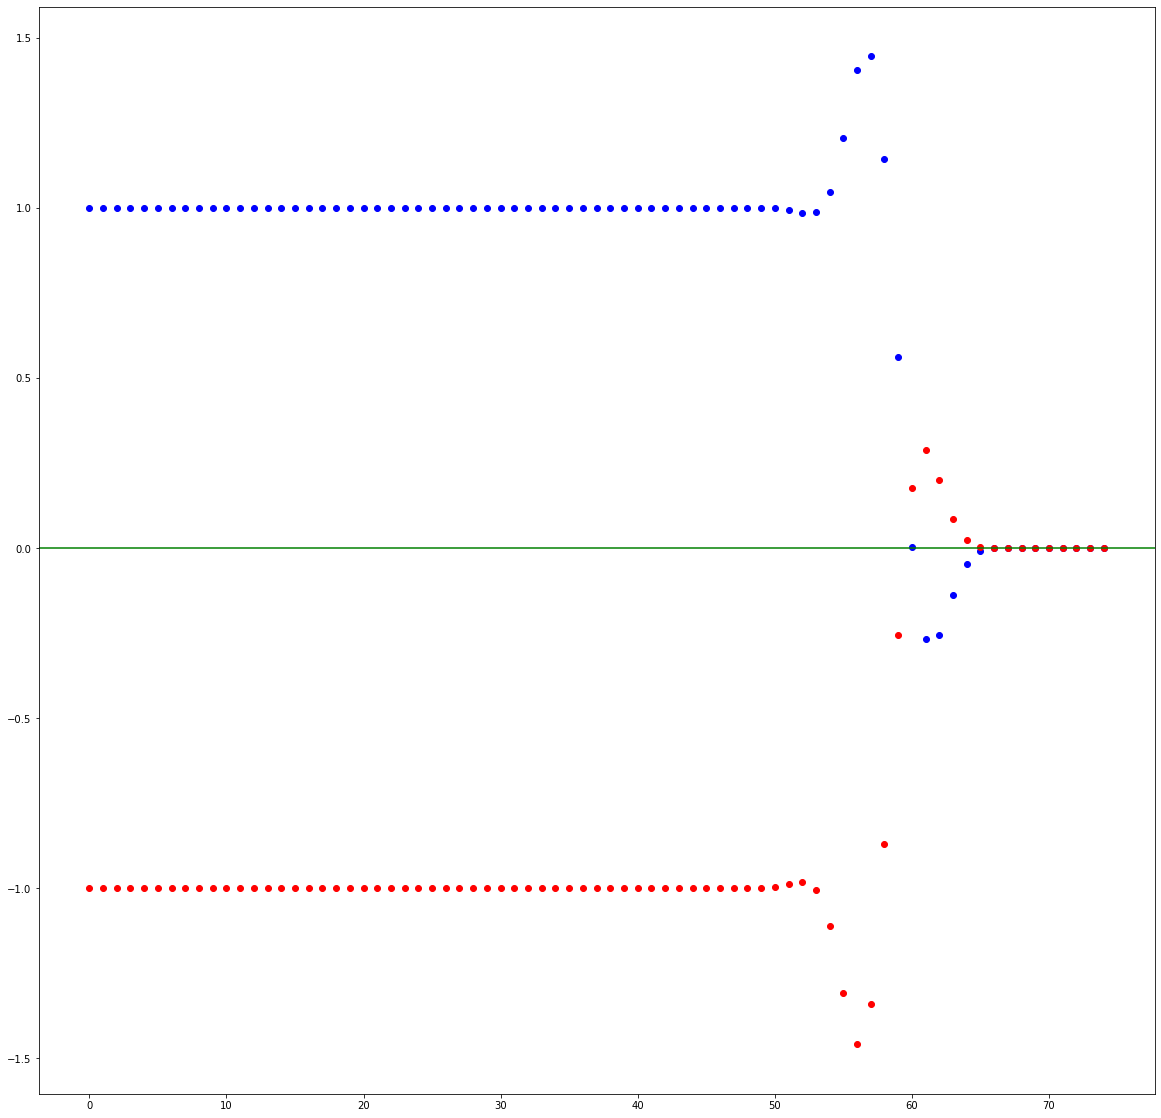

In [295]:
result_a = []
t = 50
for i in range(len(zeros)-t):
    result_a.append(a[len(zeros)-1-t,i].real)

import matplotlib.pyplot as plt
res_even = []
res_odd = []
plt.rcParams["figure.figsize"] = (20,20)
for item in range(0,len(result_a),2):
    res_even.append(result_a[item])
for item in range(1,len(result_a),2):
    res_odd.append(result_a[item])
plt.plot(res_even, 'bo')
plt.plot(res_odd, 'ro')
plt.axhline(y=0, color='green', linestyle='-')
plt.show()

Для 140 нулей:

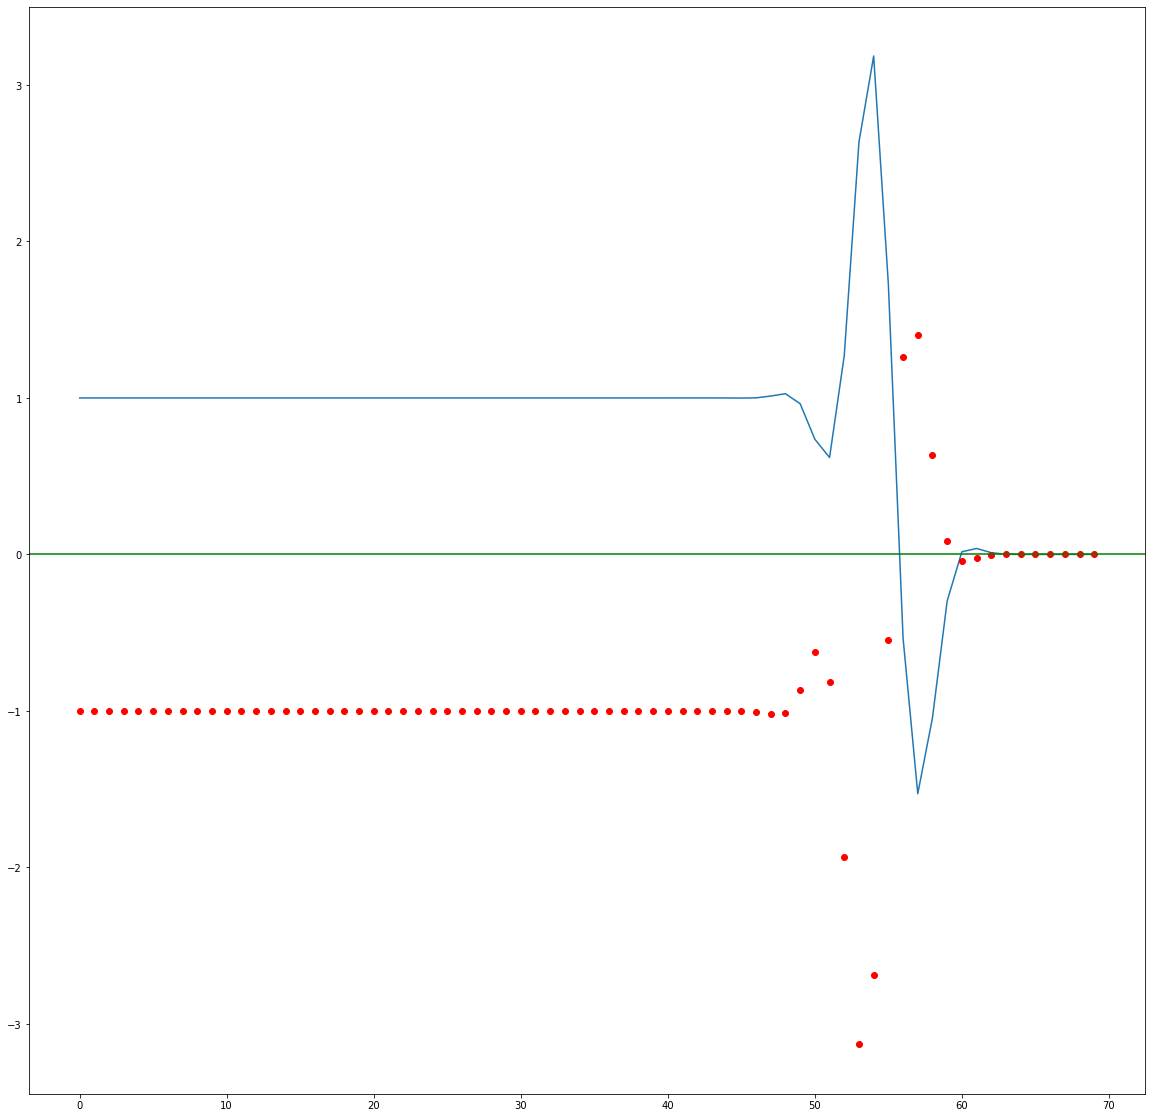

In [299]:
result_a = []
t = 60
for i in range(len(zeros)-t):
    result_a.append(a[len(zeros)-1-t,i].real)

import matplotlib.pyplot as plt
res_even = []
res_odd = []
plt.rcParams["figure.figsize"] = (20,20)
for item in range(0,len(result_a),2):
    res_even.append(result_a[item])
for item in range(1,len(result_a),2):
    res_odd.append(result_a[item])
plt.plot(res_even)
plt.plot(res_odd, 'ro')
plt.axhline(y=0, color='green', linestyle='-')
plt.show()

Для 130 нулей:

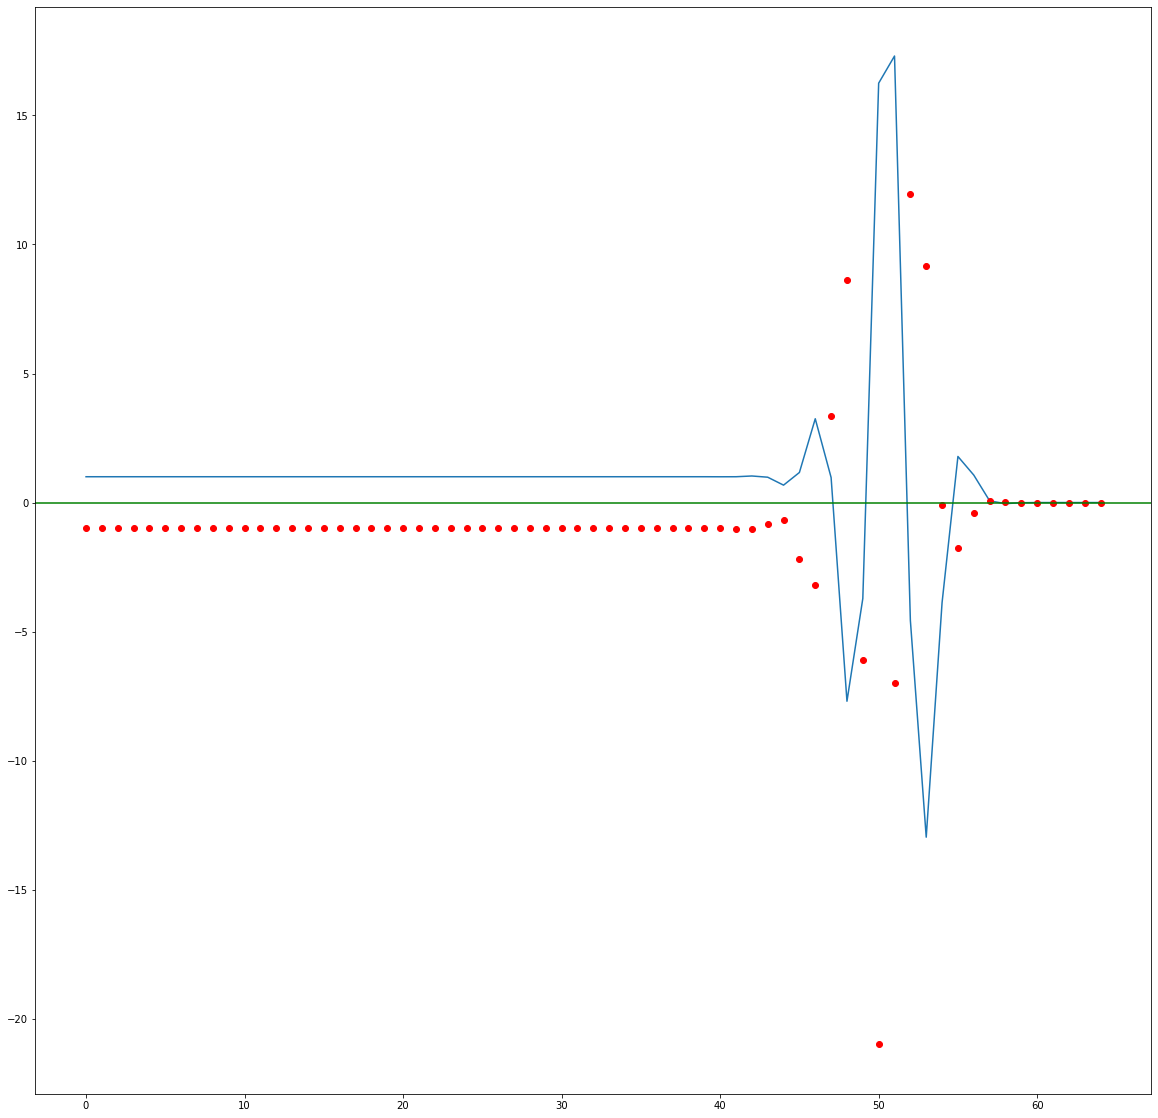

In [301]:
result_a = []
t = 70
for i in range(len(zeros)-t):
    result_a.append(a[len(zeros)-1-t,i].real)

import matplotlib.pyplot as plt
res_even = []
res_odd = []
plt.rcParams["figure.figsize"] = (20,20)
for item in range(0,len(result_a),2):
    res_even.append(result_a[item])
for item in range(1,len(result_a),2):
    res_odd.append(result_a[item])
plt.plot(res_even)
plt.plot(res_odd, 'ro')
plt.axhline(y=0, color='green', linestyle='-')
plt.show()